In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import certifi

In [6]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters, verify = certifi.where())
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [7]:
type(data)

dict

In [8]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11018,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.968995e+07,1.968995e+07,False,NaN,1,NaN,NaN,None,2024-04-25T09:08:00.000Z,64095.784721,3.147076e+10,32.2882,0.152426,-3.511659,4.297791,-9.276026,24.262320,59.633326,1.262043e+12,53.4845,1.346011e+12,None,2024-04-25T09:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976
1,1027,Ethereum,ETH,ethereum,8863,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.220481e+08,1.220481e+08,True,NaN,2,NaN,NaN,None,2024-04-25T09:07:00.000Z,3142.026274,1.453251e+10,30.8383,0.139982,-3.162973,5.008782,-13.938217,4.133220,42.230806,3.834785e+11,16.2656,3.834785e+11,None,2024-04-25T09:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976
2,825,Tether USDt,USDT,tether,84016,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.104635e+11,1.129366e+11,True,NaN,3,NaN,NaN,None,2024-04-25T09:07:00.000Z,1.000036,5.993590e+10,16.2158,0.019100,-0.007167,-0.023132,-0.025091,0.013510,0.063132,1.104675e+11,4.6856,1.129407e+11,None,2024-04-25T09:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-25 14:40:47.622976
3,1839,BNB,BNB,bnb,2151,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475883e+08,1.475883e+08,False,NaN,4,NaN,NaN,None,2024-04-25T09:07:00.000Z,608.290255,1.462742e+09,4.5710,0.039807,0.421212,10.950050,2.172237,60.198621,105.710562,8.977651e+10,3.8047,8.977651e+10,None,2024-04-25T09:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976
4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.470405e+08,5.745972e+08,True,NaN,5,NaN,NaN,None,2024-04-25T09:07:00.000Z,146.948398,3.888575e+09,25.3175,0.318156,-6.322438,12.164775,-24.204179,43.423684,67.419252,6.569189e+10,2.7840,8.443614e+10,None,2024-04-25T09:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976
5,3408,USDC,USDC,usd-coin,18669,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.343989e+10,3.343989e+10,False,NaN,6,NaN,NaN,None,2024-04-25T09:07:00.000Z,0.999989,7.324349e+09,25.2889,-0.007397,-0.019666,0.004669,-0.002854,0.005882,-0.011016,3.343952e+10,1.4189,3.343952e+10,None,2024-04-25T09:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-25 14:40:47.622976
6,52,XRP,XRP,xrp,1306,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.512914e+10,9.998767e+10,False,NaN,7,NaN,NaN,None,2024-04-25T09:08:00.000Z,0.526233,1.518006e+09,10.3968,0.602364,-3.696730,7.314744,-18.664750,-3.543659,2.486274,2.901079e+10,1.2305,5.262334e+10,None,2024-04-25T09:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.440275e+11,1.440275e+11,True,NaN,8,NaN,NaN,None,2024-04-25T09:08:00.000Z,0.150411,1.417181e+09,22.5420,0.130862,-6.888496,4.439444,-18.021265,74.857790,92.677809,2.166337e+10,0.9192,2.166337e+10,None,2024-04-25T09:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976
8,11419,Toncoin,TON,toncoin,297,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.472214e+09,5

In [14]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters, verify = certifi.where())
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])

    # If we want to create a csv and append data to it:
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\HP\Documents\Data Analytics\Python for Data Analytics\API.csv'):
        #df.to_csv(r'C:\Users\HP\Documents\Data Analytics\Python for Data Analytics\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\HP\Documents\Data Analytics\Python for Data Analytics\API.csv', mode='a', header=False)
        
    # Then to read in the file: 
    #df = pd.read_csv(r'C:\Users\HP\Documents\Data Analytics\Python for Data Analytics\API.csv')


In [15]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11018,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.968995e+07,1.968995e+07,False,NaN,1,NaN,NaN,None,2024-04-25T09:08:00.000Z,64095.784721,3.147076e+10,32.2882,0.152426,-3.511659,4.297791,-9.276026,24.262320,59.633326,1.262043e+12,53.4845,1.346011e+12,None,2024-04-25T09:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976,NaT
1,1027,Ethereum,ETH,ethereum,8863,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.220481e+08,1.220481e+08,True,NaN,2,NaN,NaN,None,2024-04-25T09:07:00.000Z,3142.026274,1.453251e+10,30.8383,0.139982,-3.162973,5.008782,-13.938217,4.133220,42.230806,3.834785e+11,16.2656,3.834785e+11,None,2024-04-25T09:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976,NaT
2,825,Tether USDt,USDT,tether,84016,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.104635e+11,1.129366e+11,True,NaN,3,NaN,NaN,None,2024-04-25T09:07:00.000Z,1.000036,5.993590e+10,16.2158,0.019100,-0.007167,-0.023132,-0.025091,0.013510,0.063132,1.104675e+11,4.6856,1.129407e+11,None,2024-04-25T09:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-25 14:40:47.622976,NaT
3,1839,BNB,BNB,bnb,2151,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475883e+08,1.475883e+08,False,NaN,4,NaN,NaN,None,2024-04-25T09:07:00.000Z,608.290255,1.462742e+09,4.5710,0.039807,0.421212,10.950050,2.172237,60.198621,105.710562,8.977651e+10,3.8047,8.977651e+10,None,2024-04-25T09:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976,NaT
4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.470405e+08,5.745972e+08,True,NaN,5,NaN,NaN,None,2024-04-25T09:07:00.000Z,146.948398,3.888575e+09,25.3175,0.318156,-6.322438,12.164775,-24.204179,43.423684,67.419252,6.569189e+10,2.7840,8.443614e+10,None,2024-04-25T09:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976,NaT
5,3408,USDC,USDC,usd-coin,18669,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.343989e+10,3.343989e+10,False,NaN,6,NaN,NaN,None,2024-04-25T09:07:00.000Z,0.999989,7.324349e+09,25.2889,-0.007397,-0.019666,0.004669,-0.002854,0.005882,-0.011016,3.343952e+10,1.4189,3.343952e+10,None,2024-04-25T09:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-25 14:40:47.622976,NaT
6,52,XRP,XRP,xrp,1306,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.512914e+10,9.998767e+10,False,NaN,7,NaN,NaN,None,2024-04-25T09:08:00.000Z,0.526233,1.518006e+09,10.3968,0.602364,-3.696730,7.314744,-18.664750,-3.543659,2.486274,2.901079e+10,1.2305,5.262334e+10,None,2024-04-25T09:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976,NaT
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.440275e+11,1.440275e+11,True,NaN,8,NaN,NaN,None,2024-04-25T09:08:00.000Z,0.150411,1.417181e+09,22.5420,0.130862,-6.888496,4.439444,-18.021265,74.857790,92.677809,2.166337e+10,0.9192,2.166337e+10,None,2024-04-25T09:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976,NaT
8,11419,Toncoin,TON,toncoin,297,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankrupt

In [17]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [18]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11018,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19689946.00000,19689946.00000,False,NaN,1,NaN,NaN,None,2024-04-25T09:08:00.000Z,64095.78472,31470756313.21666,32.28820,0.15243,-3.51166,4.29779,-9.27603,24.26232,59.63333,1262042539989.62305,53.48450,1346011479146.87012,None,2024-04-25T09:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976,NaT
1,1027,Ethereum,ETH,ethereum,8863,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122048136.08994,122048136.08994,True,NaN,2,NaN,NaN,None,2024-04-25T09:07:00.000Z,3142.02627,14532513868.71339,30.83830,0.13998,-3.16297,5.00878,-13.93822,4.13322,42.23081,383478450343.53107,16.26560,383478450343.53003,None,2024-04-25T09:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976,NaT
2,825,Tether USDt,USDT,tether,84016,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,110463515619.00531,112936550461.62344,True,NaN,3,NaN,NaN,None,2024-04-25T09:07:00.000Z,1.00004,59935899807.84217,16.21580,0.01910,-0.00717,-0.02313,-0.02509,0.01351,0.06313,110467537797.54411,4.68560,112940662687.88000,None,2024-04-25T09:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-25 14:40:47.622976,NaT
3,1839,BNB,BNB,bnb,2151,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147588281.96905,147588281.96905,False,NaN,4,NaN,NaN,None,2024-04-25T09:07:00.000Z,608.29026,1462742106.02307,4.57100,0.03981,0.42121,10.95005,2.17224,60.19862,105.71056,89776513676.13228,3.80470,89776513676.13000,None,2024-04-25T09:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976,NaT
4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,447040512.23117,574597226.99197,True,NaN,5,NaN,NaN,None,2024-04-25T09:07:00.000Z,146.94840,3888574769.26945,25.31750,0.31816,-6.32244,12.16478,-24.20418,43.42368,67.41925,65691886986.54430,2.78400,84436141838.57001,None,2024-04-25T09:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976,NaT
5,3408,USDC,USDC,usd-coin,18669,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33439892757.69286,33439892757.69286,False,NaN,6,NaN,NaN,None,2024-04-25T09:07:00.000Z,0.99999,7324348880.83526,25.28890,-0.00740,-0.01967,0.00467,-0.00285,0.00588,-0.01102,33439519840.66369,1.41890,33439519840.66000,None,2024-04-25T09:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-25 14:40:47.622976,NaT
6,52,XRP,XRP,xrp,1306,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55129144019.00000,99987674482.00000,False,NaN,7,NaN,NaN,None,2024-04-25T09:08:00.000Z,0.52623,1518005643.88757,10.39680,0.60236,-3.69673,7.31474,-18.66475,-3.54366,2.48627,29010794842.84319,1.23050,52623336275.36000,None,2024-04-25T09:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-25 14:40:47.622976,NaT
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144027516383.70523,144027516383.70523,True,NaN,8,NaN,NaN,None,2024-04-25T09:08:00.000Z,0.15041,1417181321.96855,22.54200,0.13086,-6.88850,4.43944,-18.02127,74.85779,92.67781,21663369292.86818,0.91920,21663369292.87000,N

In [19]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.10733,-3.61429,4.17100,-9.77199,24.21705,59.47144
Ethereum,0.06152,-3.40495,4.71358,-14.20315,4.15451,41.96204
Tether USDt,-0.02641,-0.02277,-0.05049,-0.02937,-0.01449,0.03119
BNB,0.58756,0.26585,11.88471,2.53690,61.29445,106.59220
Solana,0.04709,-6.62350,12.25976,-24.52917,43.47563,67.00066
USDC,-0.01686,0.00035,0.00351,0.01927,0.00689,-0.01796
XRP,0.46354,-3.67491,7.35493,-18.79859,-3.50816,2.36604
Dogecoin,0.06914,-6.94156,4.00990,-18.56812,74.65969,92.44608
Toncoin,-1.70161,-7.56758,-10.32066,1.53583,154.30385,158.54552


In [20]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.10733
              quote.USD.percent_change_24h    -3.61429
              quote.USD.percent_change_7d      4.17100
              quote.USD.percent_change_30d    -9.77199
              quote.USD.percent_change_60d    24.21705
              quote.USD.percent_change_90d    59.47144
Ethereum      quote.USD.percent_change_1h      0.06152
              quote.USD.percent_change_24h    -3.40495
              quote.USD.percent_change_7d      4.71358
              quote.USD.percent_change_30d   -14.20315
              quote.USD.percent_change_60d     4.15451
              quote.USD.percent_change_90d    41.96204
Tether USDt   quote.USD.percent_change_1h     -0.02641
              quote.USD.percent_change_24h    -0.02277
              quote.USD.percent_change_7d     -0.05049
              quote.USD.percent_change_30d    -0.02937
              quote.USD.percent_change_60d    -0.01449
              quote.US

In [21]:
type(df4)

pandas.core.series.Series

In [22]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.10733
             quote.USD.percent_change_24h  -3.61429
             quote.USD.percent_change_7d    4.17100
             quote.USD.percent_change_30d  -9.77199
             quote.USD.percent_change_60d  24.21705
             quote.USD.percent_change_90d  59.47144
Ethereum     quote.USD.percent_change_1h    0.06152
             quote.USD.percent_change_24h  -3.40495
             quote.USD.percent_change_7d    4.71358
             quote.USD.percent_change_30d -14.20315
             quote.USD.percent_change_60d   4.15451
             quote.USD.percent_change_90d  41.96204
Tether USDt  quote.USD.percent_change_1h   -0.02641
             quote.USD.percent_change_24h  -0.02277
             quote.USD.percent_change_7d   -0.05049
             quote.USD.percent_change_30d  -0.02937
             quote.USD.percent_change_60d  -0.01449
             quote.USD.percent_change_90d   0.03119
BNB          quote.USD.percent_change_1h    0.58756
             quote.USD.percent_change_24h   0.26585
             quote.USD.percent_change_7d   11.88471
             quote.USD.percent_change_30d   2.53690
             quote.USD.percent_change_60d  61.29445
             quote.USD.percent_change_90d 106.59220
Solana       quote.USD.percent_change_1h    0.04709
             quote.USD.percent_change_24h  -6.62350
             quote.USD.percent_change_7d   12.25976
             quote.USD.percent_change_30d -24.52917
             quote.USD.percent_change_60d  43.47563
             quote.USD.percent_change_90d  67.00066
USDC         quote.USD.percent_change_1h   -0.01686
             quote.USD.percent_change_24h   0.00035
             quote.USD.percent_change_7d    0.00351
             quote.USD.percent_change_30d   0.01927
             quote.USD.percent_change_60d   0.00689
             quote.USD.percent_change_90d  -0.01796
XRP          quote.USD.percent_change_1h    0.46354
             quote.USD.percent_change_24h  -3.67491
             quote.USD.percent_change_7d    7.35493
             quote.USD.percent_change_30d -18.79859
             quote.USD.percent_change_60d  -3.50816
             quote.USD.percent_change_90d   2.36604
Dogecoin     quote.USD.percent_change_1h    0.06914
             quote.USD.percent_change_24h  -6.94156
             quote.USD.percent_change_7d    4.00990
             quote.USD.percent_change_30d -18.56812
             quote.USD.percent_change_60d  74.65969
             quote.USD.percent_change_90d  92.44608
Toncoin      quote.USD.percent_change_1h   -1.70161
             quote.USD.percent_change_24h  -7.56758
             quote.USD.percent_change_7d  -10.32066
             quote.USD.percent_change_30d   1.53583
             quote.USD.percent_change_60d 154.30385
             quote.USD.percent_change_90d 158.54552
Cardano      quote.USD.percent_change_1h   -0.20671
             quote.USD.percent_change_24h  -5.42469
             quote.USD.percent_change_7d    6.37184
             quote.USD.percent_change_30d -30.07234
             quote.USD.percent_change_60d -19.90054
             quote.USD.percent_change_90d   0.16960
Shiba Inu    quote.USD.percent_change_1h    0.11500
             quote.USD.percent_change_24h  -7.28447
             quote.USD.percent_change_7d   14.91742
             quote.USD.percent_change_30d -15.12377
             quote.USD.percent_change_60d 160.63041
             quote.USD.percent_change_90d 182.29635
Avalanche    quote.USD.percent_change_1h   -0.03432
             quote.USD.percent_change_24h  -9.29564
             quote.USD.percent_change_7d    4.31898
             quote.USD.percent_change_30d -39.37176
             quote.USD.percent_change_60d  -3.41263
             quote.USD.percent_change_90d  14.54924
TRON         quote.USD.percent_change_1h    0.35283
             quote.USD.percent_change_24h   0.87654
             quote.USD.percent_change_7d    4.54394
             quote.USD.percent_change_30d

In [23]:
df5.count()

values    90
dtype: int64

In [35]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.10733
1,Bitcoin,quote.USD.percent_change_24h,-3.61429
2,Bitcoin,quote.USD.percent_change_7d,4.17100
3,Bitcoin,quote.USD.percent_change_30d,-9.77199
4,Bitcoin,quote.USD.percent_change_60d,24.21705
5,Bitcoin,quote.USD.percent_change_90d,59.47144
6,Ethereum,quote.USD.percent_change_1h,0.06152
7,Ethereum,quote.USD.percent_change_24h,-3.40495
8,Ethereum,quote.USD.percent_change_7d,4.71358
9,Ethereum,quote.USD.percent_change_30d,-14.20315


In [37]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.10733
1,Bitcoin,quote.USD.percent_change_24h,-3.61429
2,Bitcoin,quote.USD.percent_change_7d,4.17100
3,Bitcoin,quote.USD.percent_change_30d,-9.77199
4,Bitcoin,quote.USD.percent_change_60d,24.21705
5,Bitcoin,quote.USD.percent_change_90d,59.47144
6,Ethereum,quote.USD.percent_change_1h,0.06152
7,Ethereum,quote.USD.percent_change_24h,-3.40495
8,Ethereum,quote.USD.percent_change_7d,4.71358
9,Ethereum,quote.USD.percent_change_30d,-14.20315


In [39]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.10733
1,Bitcoin,24h,-3.61429
2,Bitcoin,7d,4.17100
3,Bitcoin,30d,-9.77199
4,Bitcoin,60d,24.21705
5,Bitcoin,90d,59.47144
6,Ethereum,1h,0.06152
7,Ethereum,24h,-3.40495
8,Ethereum,7d,4.71358
9,Ethereum,30d,-14.20315


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

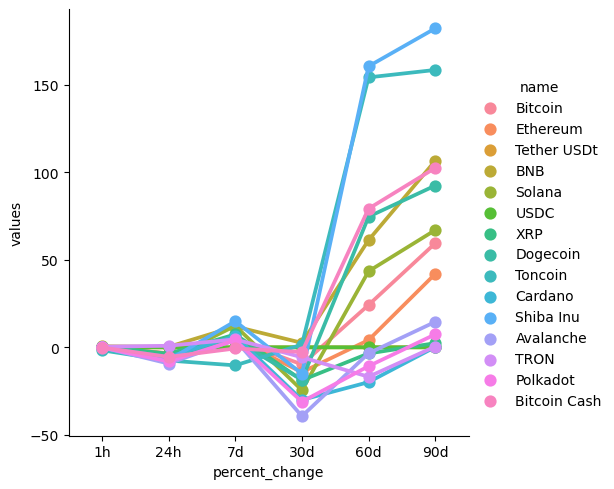

In [41]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')